# face filter challange

In [17]:
import numpy as np
import cv2
import os

In [18]:
eyes_cascade=cv2.CascadeClassifier("./third-party/frontalEyes35x16.xml")
nose_cascade=cv2.CascadeClassifier("./third-party/Nose18x15.xml")
face_cascade=cv2.CascadeClassifier("harrcascase_frontalface_alt.xml")

In [19]:
import matplotlib.pyplot as plt

In [39]:
def detectAndDisplay(frame):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.equalizeHist(frame_gray)
    #-- Detect faces
    glasses=cv2.imread('glasses.png',cv2.IMREAD_UNCHANGED)
    mush=cv2.imread('mustache.png',cv2.IMREAD_UNCHANGED)
    img=cv2.imread('Jamie_Before.jpg')
    faces = face_cascade.detectMultiScale(frame_gray)
    face_cor=faces[0]
    for (x,y,w,h) in faces:
#         center = (x + w//2, y + h//2)
#         frame = cv2.rectangle(frame,(x,y),(x+w,y+h), (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
#         -- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        eye_cor=[]
        for (x2,y2,w2,h2) in eyes:
#             eye_center = (x + x2 + w2//2, y + y2 + h2//2)
#             radius = int(round((w2 + h2)*0.25))
#             frame = cv2.rectangle(frame,(x+x2,y+y2),(x+x2+w2,y+y2+h2), (255, 0, 0 ), 4)
            idx1=0
            idx2=0
            glasses=cv2.resize(glasses,(w2,h2))
            for i in range(y+y2,y+y2+h2):
                for j in range(x+x2,x+x2+w2):
#         print(idx1,idx2)
                    if glasses[idx1,idx2,3]>0:
                        frame[i,j,:]=glasses[idx1,idx2,:3]
                    idx2+=1
                idx1+=1
                idx2=0
            eye_cor=[x+x2,y+y2,w2,h2]
            break
        nose=nose_cascade.detectMultiScale(faceROI)
        nose_cor=[]
        for (x2,y2,w2,h2) in nose:
#             nose_center = (x + x2 + w2//2, y + y2 + h2//2)
#             radius = int(round((w2 + h2)*0.25))
#             frame = cv2.rectangle(frame, (x+x2,y+y2),(x+x2+w2,y+y2+h2), (255, 0, 0 ), 4)
#             mush=cv2.resize(mush,(w2,h2))
            idx1=0
            idx2=0
            for i in range(y+y2+20,y+y2+h2+20):
                for j in range(x+x2,x+x2+w2):
#         print(idx1,idx2)
                    if mush[idx1,idx2,3]>0:
                        frame[i,j,:]=mush[idx1,idx2,:3]
                    idx2+=1
                idx1+=1
                idx2=0
            nose_cor=[x+x2,y+y2,w2,h2]
            break
    plt.imshow(frame)
    return eye_cor,nose_cor,face_cor,frame

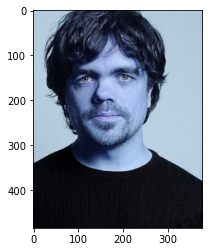

In [21]:
img1=cv2.imread("Before.png")
plt.imshow(img1)

In [22]:
img=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

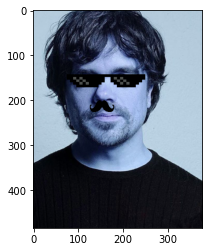

In [23]:
eye,nose,face,img1=detectAndDisplay(img1)

In [24]:
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)

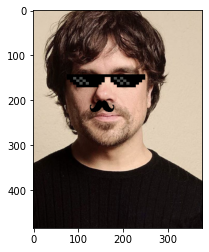

In [25]:
plt.imshow(img1)

In [26]:
img1.shape

(485, 377, 3)

In [27]:
import pandas as pd

In [28]:
img1 = img1.reshape(-1,3)

In [36]:
df=pd.DataFrame(img1,columns=["Channel 1","Channel 2","Channel 2"])

In [37]:
df.head()

,Channel 1,Channel 2,Channel 2
0,219,202,180
1,220,203,181
2,219,202,180
3,220,203,181
4,219,202,180


In [38]:
df.to_csv("filter_out.csv",index=False)